# 最急降下法による2次関数の最小化

$f(x)=(x-1)^2$を最小化する．

loss関数自体が$f(x)$である．


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

EPOCH_SIZE=20

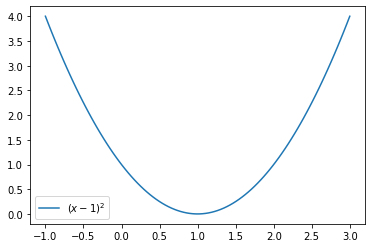

In [10]:
data_x = list(np.linspace(-1, 3, num=100))
fx = [(x - 1) ** 2 for x in data_x]
plt.plot(data_x, fx, label="$(x-1)^2$")
plt.legend()

tensorflowベース

In [11]:
x = tf.Variable(0, name="x", dtype="float32")
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
result_l = list()
for i in range(EPOCH_SIZE):
    with tf.GradientTape() as tape:
        loss = (x - 1) ** 2

    grads = tape.gradient(loss, x)
    optimizer.apply_gradients(zip([grads], [x]))
    result_l.append([i, loss.numpy(), x.numpy()])

df = pd.DataFrame(result_l, columns=["i", "loss", "x"])

In [12]:
df

,i,loss,x
0,0,1.000000,0.200000
1,1,0.640000,0.360000
2,2,0.409600,0.488000
3,3,0.262144,0.590400
4,4,0.167772,0.672320
5,5,0.107374,0.737856
6,6,0.068719,0.790285
7,7,0.043980,0.832228
8,8,0.028148,0.865782
9,9,0.018014,0.892626


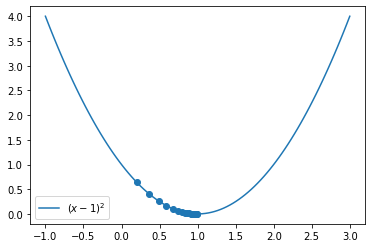

In [14]:
plt.plot(data_x, fx, label="$(x-1)^2$")
plt.scatter(df["x"].tolist(), [(x-1) ** 2 for x in df["x"]])
plt.legend()

TF2のAPIにのっているやり方

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
x = tf.Variable(0.)
loss = lambda: (x - 1) ** 2
for i in range(EPOCH_SIZE):
    step_count = optimizer.minimize(loss, [x]).numpy()
    print(step_count, x.numpy())

1 0.2
2 0.36
3 0.488
4 0.5904
5 0.67232
6 0.73785603
7 0.7902848
8 0.8322278
9 0.86578226
10 0.8926258
11 0.91410065
12 0.9312805
13 0.9450244
14 0.9560195
15 0.9648156
16 0.9718525
17 0.97748196
18 0.98198557
19 0.98558843
20 0.98847073


kerasを利用した方法

#TODO: これは無理?

In [32]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.x = tf.Variable(0.)

    def call(self, inputs):
        return tf.pow(tf.subtract(self.x, 1), 2)

In [38]:
model = MyModel()
model.build(input_shape=(None,))
model.compile()

In [39]:
model.fit(epochs=EPOCH_SIZE)

ValueError: Failed to find data adapter that can handle input: <class 'NoneType'>, <class 'NoneType'>